Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [7]:
import pandas as pd

# Read Foursquare and Yelp data saved from "yelp_foursquare_EDA" notebook into a dataframe
FSQ_df = pd.read_csv('C:\\Users\\aysha\\Documents\\Python Scripts\\Statistical-Modelling-Project\\data\\FSQ_data.csv', index_col=0)
FSQ_df.head()


yelp_df = pd.read_csv('C:\\Users\\aysha\\Documents\\Python Scripts\\Statistical-Modelling-Project\\data\\Yelp_data.csv', index_col=0)
yelp_df.head()

,alias,title,poi_id,poi_name,poi_distance,poi_location.address1,poi_rating,free_bikes,station_lat,station_long
0,mexican,Mexican,gjWtb3F23YxfYvRHWbvWWA,Angela's Cafe - Orient Heights,40.670336,1012 Bennington St,4.5,8.0,-71.006098,42.386781
1,breakfast_brunch,Breakfast & Brunch,gjWtb3F23YxfYvRHWbvWWA,Angela's Cafe - Orient Heights,40.670336,1012 Bennington St,4.5,8.0,-71.006098,42.386781
2,chinese,Chinese,nwU1tKh-D68B7Z44DbDwXg,Little Asia Restaurant,94.503416,991 Bennington St,4.0,8.0,-71.006098,42.386781
3,italian,Italian,Zm29bLI2eYCevnse4n2U1g,Luna's Restaurant Italian and Latin Cuisine,251.881247,945 Saratoga St,4.5,8.0,-71.006098,42.386781
4,latin,Latin American,Zm29bLI2eYCevnse4n2U1g,Luna's Restaurant Italian and Latin Cuisine,251.881247,945 Saratoga St,4.5,8.0,-71.006098,42.386781


In [8]:
#rename columns to meaningful names
yelp_df.rename(columns = {'alias':'category_alias', 'title':'category_title'}, inplace = True) 

In [3]:
combined_df=yelp_df[['category_alias','category_title','poi_name','poi_distance','poi_location.address1','poi_rating','free_bikes','station_lat','station_long']]

combined_df.rename(columns = {'poi_location.address1':'poi_address'}, inplace = True) 


C:\Users\aysha\AppData\Local\Temp\ipykernel_40048\527735785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df.rename(columns = {'poi_location.address1':'poi_address'}, inplace = True)


In [9]:
fsq_subset_df = FSQ_df[['short_name','name','poi_name','poi_distance','poi_location.address','free_bikes','station_lat','station_long']]
#fsq_subset_df

#rename columns to match final joined dataset
fsq_subset_df.rename(columns = {'short_name':'category_alias', 'name':'category_title','poi_location.address':'poi_address'}, inplace = True) 

combined_df=pd.concat([combined_df, fsq_subset_df], ignore_index = True)

C:\Users\aysha\AppData\Local\Temp\ipykernel_40048\353309240.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fsq_subset_df.rename(columns = {'short_name':'category_alias', 'name':'category_title','poi_location.address':'poi_address'}, inplace = True)


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category_alias  368 non-null    object 
 1   category_title  368 non-null    object 
 2   poi_name        368 non-null    object 
 3   poi_distance    368 non-null    float64
 4   poi_address     366 non-null    object 
 5   poi_rating      212 non-null    float64
 6   free_bikes      78 non-null     float64
 7   station_lat     78 non-null     float64
 8   station_long    78 non-null     float64
dtypes: float64(5), object(4)
memory usage: 26.0+ KB


In [15]:
combined_df.describe()

,poi_distance,poi_rating,free_bikes,station_lat,station_long
count,368.000000,212.000000,78.000000,78.000000,78.000000
mean,415.975085,4.030660,6.820513,-71.029513,42.375703
std,307.030993,0.664077,2.306082,0.014439,0.007429
min,40.670336,1.000000,2.000000,-71.041020,42.368844
25%,194.000000,4.000000,7.000000,-71.039778,42.369536
50%,362.000000,4.000000,7.000000,-71.039431,42.373312
75%,504.000000,4.500000,8.000000,-71.016191,42.383533
max,1369.377311,5.000000,9.000000,-71.006098,42.386781


In [16]:
combined_df.shape

(368, 9)

In [26]:
# percentage of missing values in each column
round(100 * (combined_df.isnull().sum()/len(combined_df)),2).sort_values(ascending=False)

free_bikes        78.80
station_lat       78.80
station_long      78.80
poi_rating        42.39
poi_address        0.54
category_alias     0.00
category_title     0.00
poi_name           0.00
poi_distance       0.00
dtype: float64

In [ ]:
#duplicate check
combined_df_d=combined_df.copy()
combined_df_d.drop_duplicates(subset=None, inplace=True)
combined_df_d.shape
#same record count, no duplicates found

In [27]:
#save the final dataset into a file

combined_df.to_csv('C:\\Users\\aysha\\Documents\\Python Scripts\\Statistical-Modelling-Project\\data\\Combined_POI_data.csv')

In [28]:
analysis_df=combined_df[['poi_distance','poi_rating','free_bikes']]

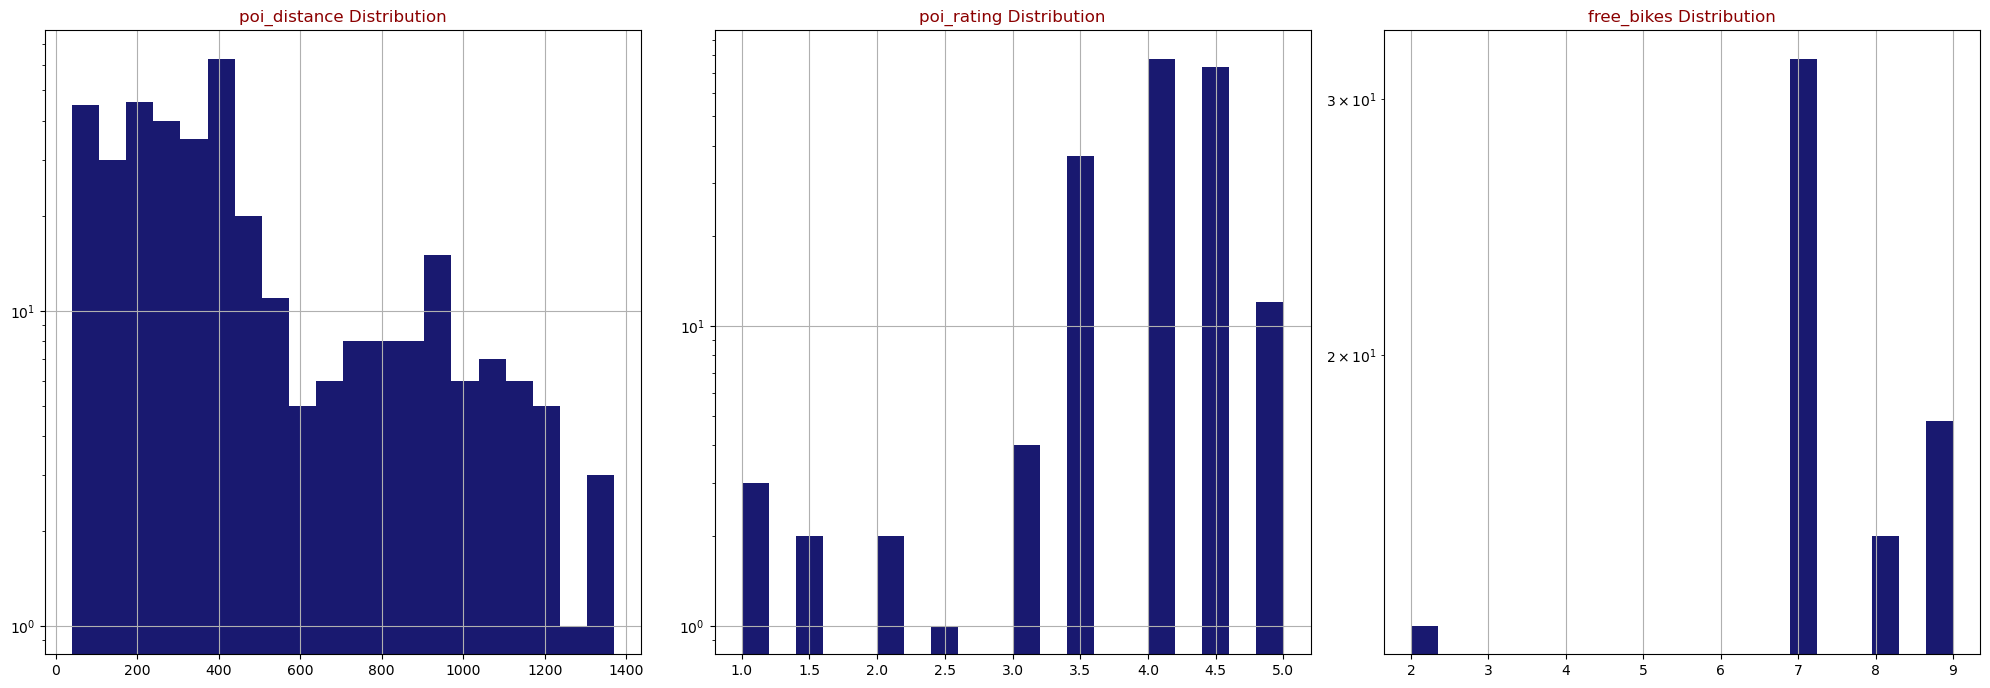

In [29]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(analysis_df,analysis_df.columns,3,3)

In [25]:
combined_df.category.value_counts()

category_alias
seafood             18
italian             17
mexican             16
Park                14
breakfast_brunch    11
                    ..
convenience          1
hotdog               1
dominican            1
localflavor          1
empanadas            1
Name: count, Length: 88, dtype: int64

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [12]:
import sqlite3
from sqlite3 import Error

#function to create connection
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

connection = create_connection('C:\\Users\\aysha\\Documents\\Python Scripts\\Statistical-Modelling-Project\\data\\BikesharePOI.db')

Connection to SQLite DB successful


Look at the data before and after the join to validate your data.

In [23]:
create_table_sql = """
CREATE TABLE IF NOT EXISTS poi_data (
  category_alias  TEXT,
  category_title TEXT,
  poi_name TEXT,
  poi_distance FLOAT,
  poi_address  TEXT,
  poi_rating   FLOAT   
);
"""

#function to run queries using connections created and query passed as argument
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")
        
execute_query(connection, create_table_sql)  

Query executed successfully


In [24]:
combined_df.to_sql(name="poi_data",con=connection,if_exists='replace',index=False)

41